In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
df_Cust = pd.read_csv('customer_data.csv')
df_Cust.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [30]:
df_Cust.shape

(1125, 13)

In [31]:
df_pay = pd.read_csv('payment_data.csv')
df_pay.head()

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
4,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016


In [34]:
df = pd.merge(df_Cust, df_pay, on = 'id', how='outer')

In [35]:
df.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,9,10,60500.0,31/01/2015,6657.6,18934.0,19/09/2015
1,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,18,10,NaN,28/04/2009,153792.0,149387.0,10/08/2015
2,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,1,5,NaN,30/03/2009,0.0,150500.0,NaN
3,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,2,26,11906,6,10,NaN,17/05/2007,0.0,46371.0,12/07/2013
4,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,4,6,NaN,02/06/2016,15120.0,21500.0,19/04/2016


In [36]:
df.isnull().sum()

label                 0
id                    0
fea_1                 0
fea_2              1028
fea_3                 0
fea_4                 0
fea_5                 0
fea_6                 0
fea_7                 0
fea_8                 0
fea_9                 0
fea_10                0
fea_11                0
OVD_t1                0
OVD_t2                0
OVD_t3                0
OVD_sum               0
pay_normal            0
prod_code             0
prod_limit         6118
update_date          26
new_balance           0
highest_balance     409
report_date        1114
dtype: int64

In [37]:
df.shape

(8250, 24)

In [41]:
df['update_year']=df['update_date'].str.split('/').str[2]

In [42]:
df['report_year']=df['report_date'].str.split('/').str[2]

In [43]:
df.drop(['update_date','report_date'], axis=1, inplace=True)

In [44]:
df.head(2)

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance,update_year,report_year
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,9,10,60500.0,6657.6,18934.0,2015,2015
1,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,18,10,NaN,153792.0,149387.0,2009,2015


In [45]:
df.isnull().sum()

label                 0
id                    0
fea_1                 0
fea_2              1028
fea_3                 0
fea_4                 0
fea_5                 0
fea_6                 0
fea_7                 0
fea_8                 0
fea_9                 0
fea_10                0
fea_11                0
OVD_t1                0
OVD_t2                0
OVD_t3                0
OVD_sum               0
pay_normal            0
prod_code             0
prod_limit         6118
new_balance           0
highest_balance     409
update_year          26
report_year        1114
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8250 entries, 0 to 8249
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   label            8250 non-null   int64  
 1   id               8250 non-null   int64  
 2   fea_1            8250 non-null   int64  
 3   fea_2            7222 non-null   float64
 4   fea_3            8250 non-null   int64  
 5   fea_4            8250 non-null   float64
 6   fea_5            8250 non-null   int64  
 7   fea_6            8250 non-null   int64  
 8   fea_7            8250 non-null   int64  
 9   fea_8            8250 non-null   int64  
 10  fea_9            8250 non-null   int64  
 11  fea_10           8250 non-null   int64  
 12  fea_11           8250 non-null   float64
 13  OVD_t1           8250 non-null   int64  
 14  OVD_t2           8250 non-null   int64  
 15  OVD_t3           8250 non-null   int64  
 16  OVD_sum          8250 non-null   int64  
 17  pay_normal    

In [48]:
df.fillna(df.mean(), inplace=True)

<ipython-input-48-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [49]:
df.duplicated().sum()

96

In [50]:
df.isnull().sum()

label                 0
id                    0
fea_1                 0
fea_2                 0
fea_3                 0
fea_4                 0
fea_5                 0
fea_6                 0
fea_7                 0
fea_8                 0
fea_9                 0
fea_10                0
fea_11                0
OVD_t1                0
OVD_t2                0
OVD_t3                0
OVD_sum               0
pay_normal            0
prod_code             0
prod_limit            0
new_balance           0
highest_balance       0
update_year          26
report_year        1114
dtype: int64

In [51]:
df['update_year'] = pd.to_numeric(df['update_year'], errors='coerce')

In [52]:
df['report_year'] = pd.to_numeric(df['report_year'], errors='coerce')

In [53]:
df.fillna(df.mean(), inplace=True)

In [54]:
df.isnull().sum()

label              0
id                 0
fea_1              0
fea_2              0
fea_3              0
fea_4              0
fea_5              0
fea_6              0
fea_7              0
fea_8              0
fea_9              0
fea_10             0
fea_11             0
OVD_t1             0
OVD_t2             0
OVD_t3             0
OVD_sum            0
pay_normal         0
prod_code          0
prod_limit         0
new_balance        0
highest_balance    0
update_year        0
report_year        0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8250 entries, 0 to 8249
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   label            8250 non-null   int64  
 1   id               8250 non-null   int64  
 2   fea_1            8250 non-null   int64  
 3   fea_2            8250 non-null   float64
 4   fea_3            8250 non-null   int64  
 5   fea_4            8250 non-null   float64
 6   fea_5            8250 non-null   int64  
 7   fea_6            8250 non-null   int64  
 8   fea_7            8250 non-null   int64  
 9   fea_8            8250 non-null   int64  
 10  fea_9            8250 non-null   int64  
 11  fea_10           8250 non-null   int64  
 12  fea_11           8250 non-null   float64
 13  OVD_t1           8250 non-null   int64  
 14  OVD_t2           8250 non-null   int64  
 15  OVD_t3           8250 non-null   int64  
 16  OVD_sum          8250 non-null   int64  
 17  pay_normal    

In [56]:
df.drop(['id'], axis=1, inplace=True)

In [57]:
df.head(2)

,label,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,...,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance,update_year,report_year
0,1,5,1245.5,3,77000.0,2,15,5,109,5,...,0,0,0,9,10,60500.000000,6657.6,18934.0,2015.0,2015.0
1,1,5,1245.5,3,77000.0,2,15,5,109,5,...,0,0,0,18,10,85789.702205,153792.0,149387.0,2009.0,2015.0


In [58]:
X = df.drop(['label'], axis=1)
y = df.label

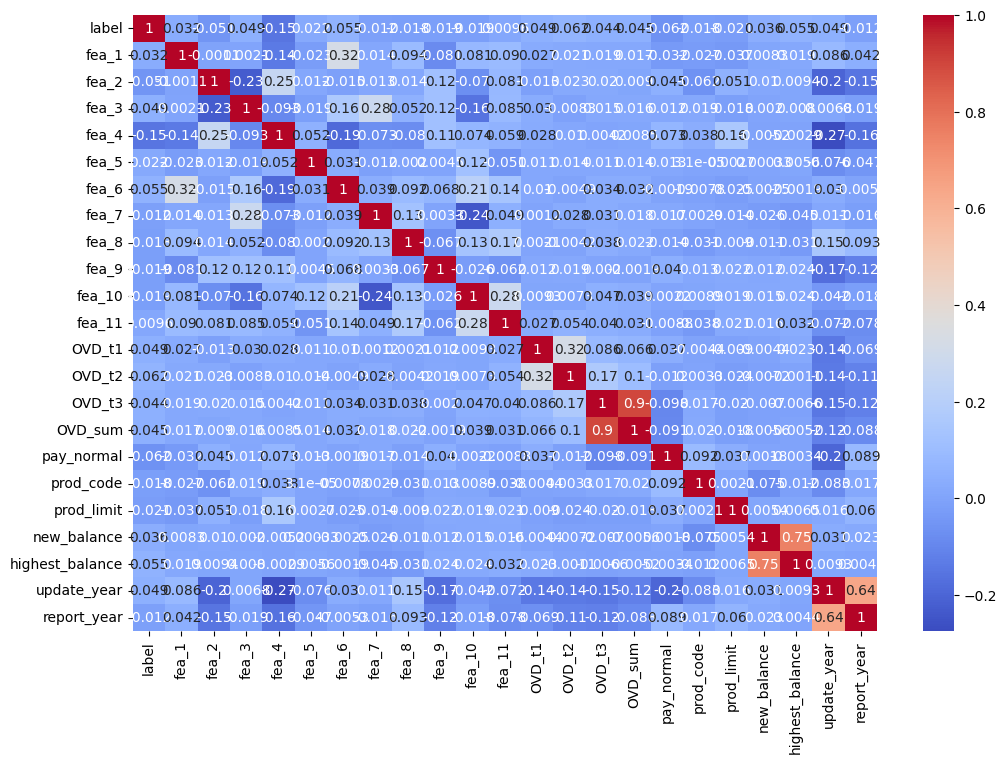

In [59]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
sc = StandardScaler()

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [64]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
RFC = RandomForestClassifier(n_estimators=100, random_state=0)

In [68]:
RFC.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [69]:
y_pred_rf = RFC.predict(X_test)

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [71]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2051
           1       1.00      0.60      0.75       424

    accuracy                           0.93      2475
   macro avg       0.96      0.80      0.86      2475
weighted avg       0.94      0.93      0.92      2475



In [72]:
print(confusion_matrix(y_test, y_pred_rf))

[[2050    1]
 [ 168  256]]


In [112]:
rf_ac = accuracy_score(y_test, y_pred_rf)
rf_ac

0.9317171717171717

In [74]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [75]:
from sklearn.ensemble import BaggingClassifier
BTC = BaggingClassifier(base_estimator=dt, n_estimators=100, random_state=0)

In [76]:
BTC.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=0)

In [77]:
y_pred_BTC = BTC.predict(X_test)

In [113]:
print(classification_report(y_test, y_pred_BTC))
print(confusion_matrix(y_test, y_pred_BTC))
BTC_ac = accuracy_score(y_test, y_pred_BTC)
BTC_ac

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2051
           1       0.99      0.86      0.92       424

    accuracy                           0.97      2475
   macro avg       0.98      0.93      0.95      2475
weighted avg       0.97      0.97      0.97      2475

[[2047    4]
 [  59  365]]


0.9745454545454545

In [81]:
from sklearn.ensemble import ExtraTreesClassifier

In [83]:
ETC = ExtraTreesClassifier(n_estimators=100, max_features=18, random_state=0)

In [84]:
ETC.fit(X_train, y_train)
y_pred_ETC = ETC.predict(X_test)

In [114]:
print(classification_report(y_test, y_pred_ETC))
print(confusion_matrix(y_test, y_pred_ETC))
ETC_ac = accuracy_score(y_test, y_pred_ETC)
ETC_ac

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2051
           1       0.99      0.93      0.96       424

    accuracy                           0.99      2475
   macro avg       0.99      0.97      0.98      2475
weighted avg       0.99      0.99      0.99      2475

[[2047    4]
 [  28  396]]


0.9870707070707071

In [86]:
from sklearn.ensemble import AdaBoostClassifier

In [89]:
ABC = AdaBoostClassifier(n_estimators=100, random_state=0)
ABC.fit(X_train, y_train)
y_pred_ABC = ABC.predict(X_test)

In [115]:
print(classification_report(y_test, y_pred_ABC))
print(confusion_matrix(y_test, y_pred_ABC))
ABC_ac = accuracy_score(y_test, y_pred_ABC)
ABC_ac

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2051
           1       0.71      0.27      0.39       424

    accuracy                           0.86      2475
   macro avg       0.79      0.62      0.65      2475
weighted avg       0.84      0.86      0.83      2475

[[2003   48]
 [ 309  115]]


0.8557575757575757

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

In [93]:
GBC = GradientBoostingClassifier(n_estimators=100,random_state=0)
GBC.fit(X_train, y_train)
y_pred_GBC = GBC.predict(X_test)

In [116]:
print(classification_report(y_test, y_pred_GBC))
print(confusion_matrix(y_test, y_pred_GBC))
GBC_ac = accuracy_score(y_test, y_pred_GBC)
GBC_ac

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2051
           1       0.98      0.37      0.54       424

    accuracy                           0.89      2475
   macro avg       0.93      0.69      0.74      2475
weighted avg       0.90      0.89      0.87      2475

[[2048    3]
 [ 266  158]]


0.8913131313131313

In [98]:
from xgboost import XGBClassifier

In [103]:
XGBC = XGBClassifier(n_estimators=100, random_state=0)
XGBC.fit(X_train, y_train)
y_pred_XGBC = XGBC.predict(X_test)

In [117]:
print(classification_report(y_test, y_pred_XGBC))
print(confusion_matrix(y_test, y_pred_XGBC))
XGBC_ac = accuracy_score(y_test, y_pred_XGBC)
XGBC_ac

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2051
           1       0.98      0.91      0.94       424

    accuracy                           0.98      2475
   macro avg       0.98      0.95      0.96      2475
weighted avg       0.98      0.98      0.98      2475

[[2042    9]
 [  39  385]]


0.9806060606060606

In [106]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 1.9 MB/s eta 0:00:00


In [107]:
from catboost import CatBoostClassifier

In [108]:
CBC = CatBoostClassifier(n_estimators=100, random_state=0)
CBC.fit(X_train, y_train)
y_pred_CBC = CBC.predict(X_test)

Learning rate set to 0.179935
0:	learn: 0.5921917	total: 70.7ms	remaining: 7s
1:	learn: 0.5256908	total: 91ms	remaining: 4.46s
2:	learn: 0.4905755	total: 100ms	remaining: 3.25s
3:	learn: 0.4636019	total: 126ms	remaining: 3.02s
4:	learn: 0.4379024	total: 140ms	remaining: 2.67s
5:	learn: 0.4222122	total: 152ms	remaining: 2.38s
6:	learn: 0.4076992	total: 164ms	remaining: 2.18s
7:	learn: 0.3962699	total: 174ms	remaining: 2s
8:	learn: 0.3831510	total: 181ms	remaining: 1.83s
9:	learn: 0.3735047	total: 195ms	remaining: 1.76s
10:	learn: 0.3538571	total: 209ms	remaining: 1.69s
11:	learn: 0.3487126	total: 221ms	remaining: 1.62s
12:	learn: 0.3380333	total: 231ms	remaining: 1.54s
13:	learn: 0.3340807	total: 254ms	remaining: 1.56s
14:	learn: 0.3319537	total: 264ms	remaining: 1.5s
15:	learn: 0.3299326	total: 269ms	remaining: 1.41s
16:	learn: 0.3202272	total: 275ms	remaining: 1.34s
17:	learn: 0.3138696	total: 283ms	remaining: 1.29s
18:	learn: 0.3096130	total: 301ms	remaining: 1.28s
19:	learn: 0.30148

In [118]:
print(classification_report(y_test, y_pred_CBC))
print(confusion_matrix(y_test, y_pred_CBC))
CBC_ac = accuracy_score(y_test, y_pred_CBC)
CBC_ac

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2051
           1       0.98      0.74      0.84       424

    accuracy                           0.95      2475
   macro avg       0.96      0.87      0.91      2475
weighted avg       0.95      0.95      0.95      2475

[[2044    7]
 [ 111  313]]


0.9523232323232323

In [125]:
prediction_list = [rf_ac*100, BTC_ac*100, ETC_ac*100, ABC_ac*100, GBC_ac*100, XGBC_ac*100, CBC_ac*100]

In [126]:
print(prediction_list)

[93.17171717171718, 97.45454545454545, 98.70707070707071, 85.57575757575758, 89.13131313131314, 98.06060606060606, 95.23232323232324]


In [121]:
models_list = ['RandomForset', 'BaggingTree', 'ExtraTress', 'AdaBoost', 'GradientBoost', 'XGBoost', 'CatBoost']

In [128]:
result = dict(zip(models_list,prediction_list))

In [129]:
print(result)

{'RandomForset': 93.17171717171718, 'BaggingTree': 97.45454545454545, 'ExtraTress': 98.70707070707071, 'AdaBoost': 85.57575757575758, 'GradientBoost': 89.13131313131314, 'XGBoost': 98.06060606060606, 'CatBoost': 95.23232323232324}


In [ ]:
#Conclusion
#from all the above Bagging and Boosting techniques we can conclude that ExtraTress and XGBoost has got highestaccuray.